## 1. K-means 클러스터링
K-means 클러스터링은 비지도 학습 알고리즘으로, 데이터를 K개의 클러스터로 그룹화합니다. 

알고리즘은 다음과 같이 작동합니다:

##### 1. K개의 초기 중심점(센트로이드)을 임의로 선택합니다.
##### 2. 각 데이터 포인트를 가장 가까운 중심점에 할당합니다.
##### 3. 각 클러스터의 중심점을, 해당 클러스터에 할당된 모든 데이터 포인트의 평균으로 업데이트합니다.
##### 4. 중심점이 더 이상 변하지 않거나 최대 반복 횟수에 도달할 때까지 2-3단계를 반복합니다.

K-means의 장점은 구현이 간단하고 대규모 데이터셋에도 효율적이지만 초기 중심점 선택에 민감하고, 클러스터 수(K)를 사전에 지정해야 하며, 비선형 데이터에 대해 성능이 떨어질 수 있습니다.

c:\Users\inhag\.virtualenvs\Chapter3-MOUFoQMc\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\inhag\.virtualenvs\Chapter3-MOUFoQMc\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\inhag\.pyenv\pyenv-win\versions\3.12.8\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\inhag\.pyenv\pyenv-win\versions\3.12.8\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\inhag\.pyenv\pyenv-win\versions\3.12.8\Li

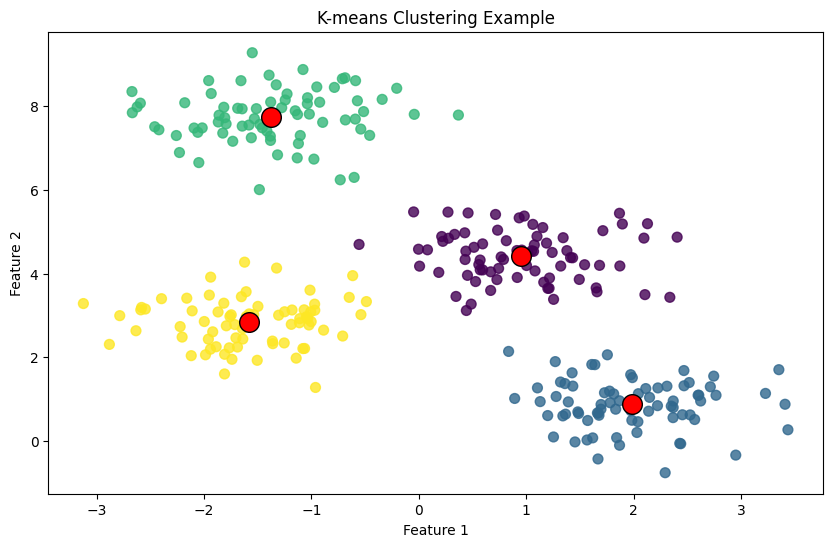

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 샘플 데이터 생성
kmeans = KMeans(n_clusters=4)  # 클러스터 수 설정
kmeans.fit(X)  # 모델 학습
y_kmeans = kmeans.predict(X) # 클러스터 할당
centers = kmeans.cluster_centers_  # 클러스터 중심점

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.8) # 데이터 포인트 시각화
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='o', edgecolors='black') # 중심점 시각화
plt.title('K-means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 2. SVM (서포트 벡터 머신)
SVM은 데이터를 분류하기 위해 최적의 결정 경계(마진)를 찾는 지도 학습 알고리즘입니다. 

주요 특징은 다음과 같습니다.

- 마진 최대화: 두 클래스 사이의 마진을 최대화하여 일반화 성능을 향상시킵니다.
- 서포트 벡터: 결정 경계에 가장 가까운 데이터 포인트들이 서포트 벡터가 됩니다.
- 커널 트릭: 비선형 문제를 해결하기 위해 데이터를 고차원 공간으로 매핑합니다.

뇌종양 분류와 같은 의료 이미지 분석에서 SVM은 높은 정확도와 좋은 일반화 능력을 보여 자주 사용됩니다. 단점으로는 대규모 데이터셋에서 계산 비용이 높고, 최적의 커널과 하이퍼파라미터 선택이 어려울 수 있습니다.

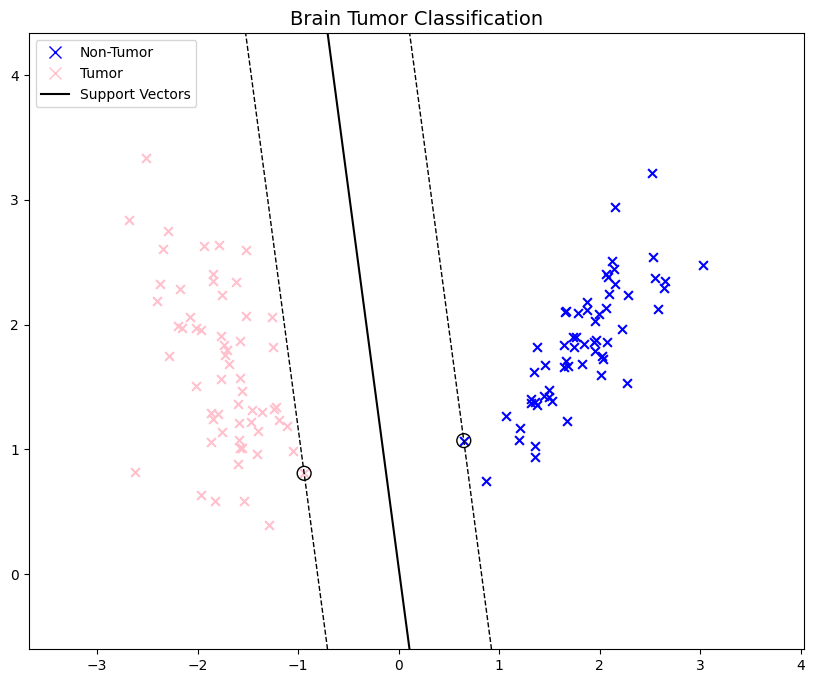

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# 종양 분류를 위한 샘플 데이터 생성 - 자연스러운 분리
X, y = make_classification(n_samples=120, n_features=2, n_redundant=0, 
                          n_informative=2, random_state=3, class_sep=1.8,
                          n_clusters_per_class=1)

# 선형 SVM 모델 적용
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# 그래프 생성
plt.figure(figsize=(10, 8))

# 결정 경계 계산을 위한 그리드 생성
ax = plt.gca()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = np.linspace(y_min, y_max, 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진 그리기
ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=1,
          linestyles=['--', '-', '--'], linewidths=[1, 1.5, 1])

# 데이터 포인트 그리기
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='x', s=40)
plt.scatter(X[y==1, 0], X[y==1, 1], c='pink', marker='x', s=40)

# 서포트 벡터 표시(여기서는 직접 표시하지 않고 범례에만 포함)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
          linewidth=1, facecolors='none', edgecolors='black')

# 그래프 제목 및 레이블 설정
plt.title('Brain Tumor Classification', fontsize=14)

# 범례 설정
legend_elements = [
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='w', markeredgecolor='blue', markersize=8, label='Non-Tumor'),
    plt.Line2D([0], [0], marker='x', color='w', markerfacecolor='w', markeredgecolor='pink', markersize=8, label='Tumor'),
    plt.Line2D([0], [0], color='black', label='Support Vectors')
]
plt.legend(handles=legend_elements, loc='upper left', frameon=True)

plt.grid(False)
plt.show()

#### 3. 의사결정 트리 (Decision Tree)
의사결정 트리는 특성에 기반한 일련의 결정 규칙을 사용하여 데이터를 분류하거나 회귀 분석하는 모델입니다.

- 구조: 루트 노드에서 시작하여 리프 노드에서 끝나는 트리 형태입니다.
- 분할 기준: 정보 이득(Information Gain), 지니 불순도(Gini Impurity), 분산 감소 등을 기준으로 최적의 분할을 결정합니다.

직관적이고 해석하기 쉬우며, 데이터 전처리 과정이 많지 않으나 과적합 경향이 있고, 작은 데이터 변화에도 트리 구조가 크게 바뀔 수 있습니다.

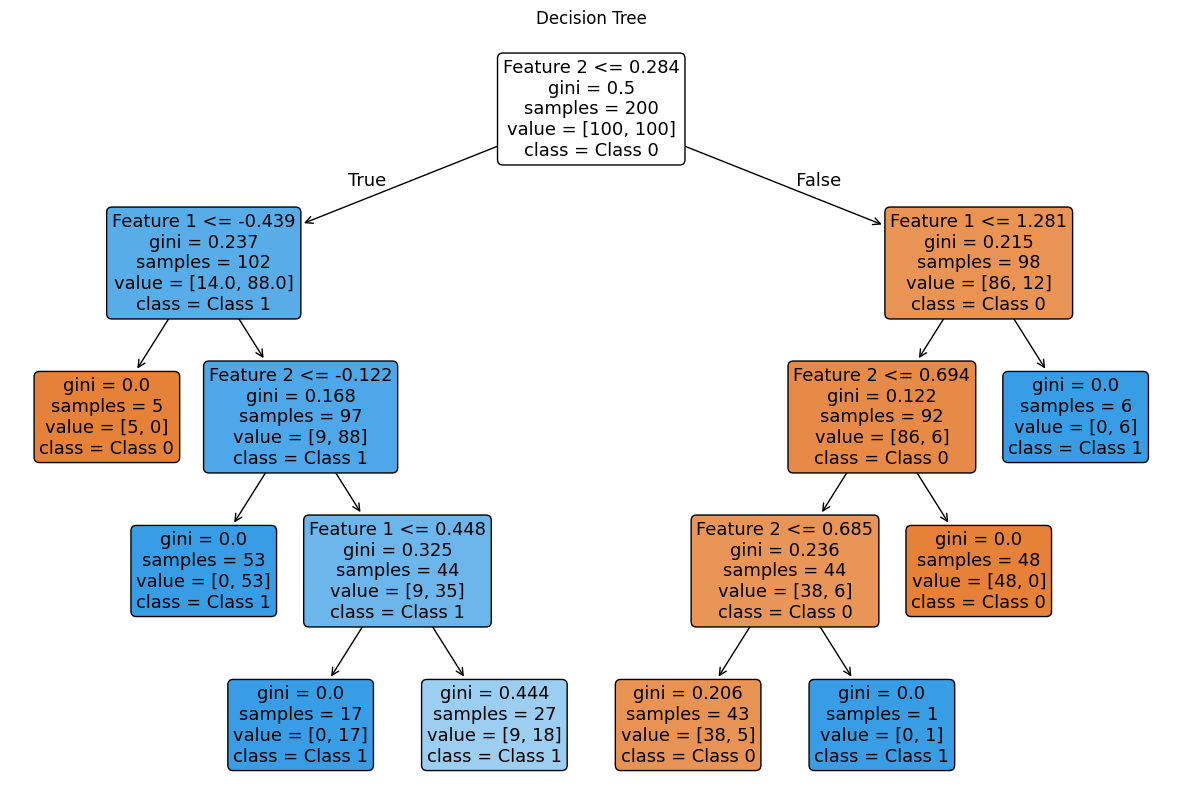

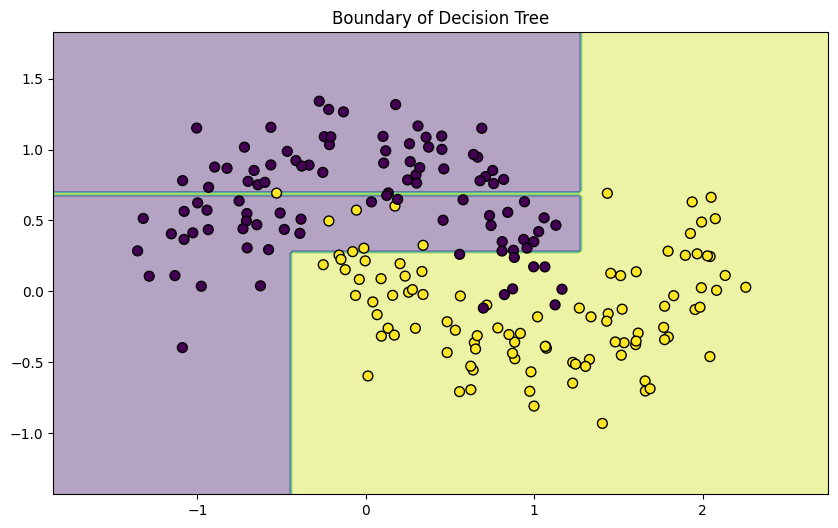

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_moons

# 샘플 데이터 생성
X, y = make_moons(n_samples=200, noise=0.2, random_state=0)  # 초승달 모양 데이터

# 의사결정 트리 학습
clf = DecisionTreeClassifier(max_depth=4, random_state=0)  # 최대 깊이 4로 제한
clf.fit(X, y)  # 모델 학습

# 의사결정 트리 시각화
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], 
          class_names=['Class 0', 'Class 1'], rounded=True)  # 트리 구조 시각화
plt.title('Decision Tree')
plt.show()

# 결정 경계 시각화
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드 포인트 예측
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)  # 결정 경계 채우기
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')  # 데이터 포인트
plt.title('Boundary of Decision Tree')
plt.show()

#### 4. 랜덤 포레스트 (Random Forest)
랜덤 포레스트는 여러 의사결정 트리를 앙상블한 모델로, 다음과 같은 특징이 있습니다:

- 배깅(Bagging): 원본 데이터셋에서 무작위로 샘플을 추출하여 여러 트리를 학습시킵니다.
- 특성 무작위화: 각 분할마다 특성의 무작위 하위 집합만 고려합니다.
- 다수결 투표/평균: 분류 문제에서는 다수결 투표로, 회귀 문제에서는 예측값의 평균으로 최종 결과를 결정합니다.

장점으로는 과적합 감소, 높은 정확도, 특성 중요도 평가가 가능하다는 점이 있습니다. 다만, 단일 트리보다 해석이 어렵고, 계산 비용이 높으며, 너무 깊은 트리는 과적합이 문제될 수 있습니다.

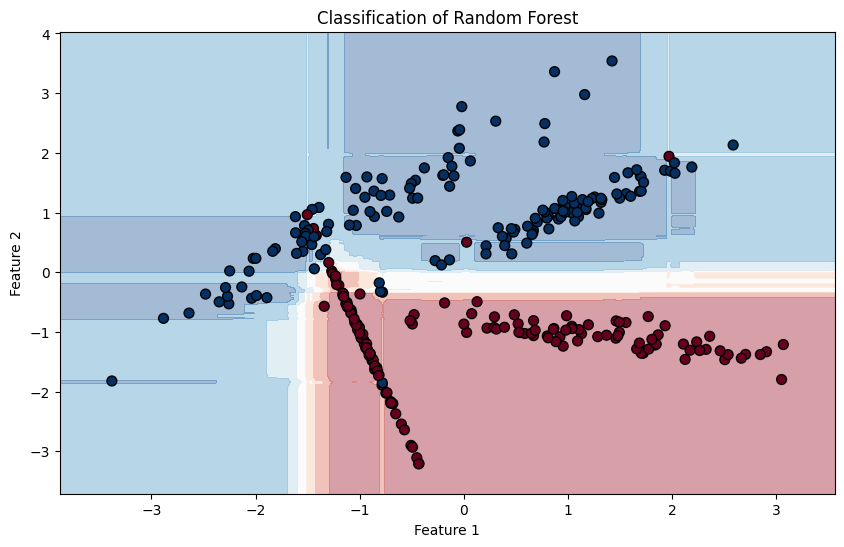

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# 샘플 데이터 생성
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, random_state=0)

# 랜덤 포레스트 학습
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)  # 100개 트리, 깊이 4
clf.fit(X, y)  # 모델 학습

# 결정 경계 시각화
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # 클래스 1의 확률
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)  # 확률 기반 경계 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap=plt.cm.RdBu)  # 데이터 포인트
plt.title('Classification of Random Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 5. 나이브 베이즈 분류기 (Naive Bayes)
나이브 베이즈는 베이즈 정리를 기반으로 한 확률적 분류 알고리즘입니다.

- 조건부 독립 가정: 모든 특성이 서로 독립적이라고 가정합니다(나이브 가정).
- 베이즈 정리: P(y|X) = P(X|y) * P(y) / P(X) 공식을 사용하여 확률을 계산합니다.
- 유형: 가우시안, 다항, 베르누이 등 여러 변형이 있습니다.

장점은 구현이 간단하고, 작은 훈련 데이터셋에서도 잘 작동하며, 텍스트 분류와 같은 고차원 문제에 효과적입니다. 하지만, 특성 독립성 가정이 현실적이지 않은 경우가 많다는 점이 있습니다.

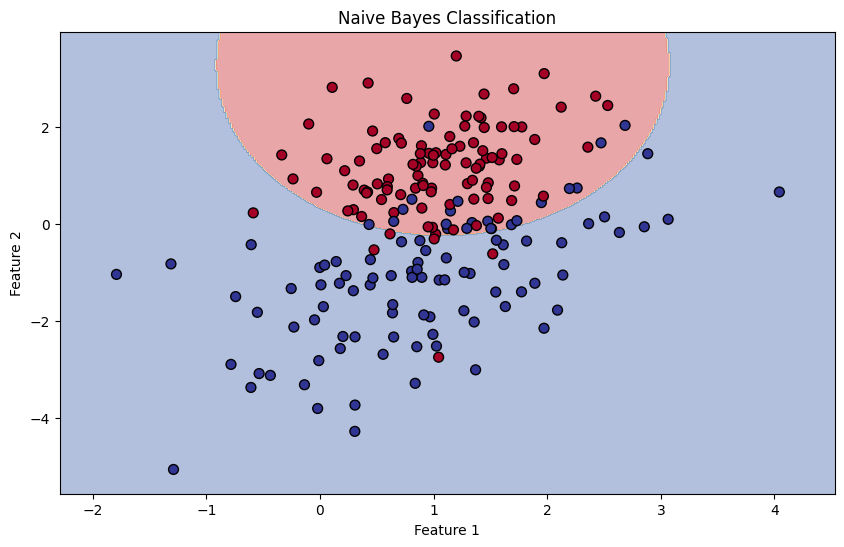

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# 샘플 데이터 생성
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, random_state=1, n_clusters_per_class=1)

# 가우시안 나이브 베이즈 학습
gnb = GaussianNB()  # 가우시안 나이브 베이즈 모델 생성
gnb.fit(X, y)  # 모델 학습

# 결정 경계 시각화
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드 포인트 예측
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)  # 결정 경계 채우기
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap=plt.cm.RdYlBu)  # 데이터 포인트
plt.title('Naive Bayes Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### 6. 가우시안 프로세스 (Gaussian Process)
가우시안 프로세스는 확률 분포를 이용한 비모수적 베이지안 접근법입니다.

- 커널 함수: 데이터 포인트 간의 유사성을 측정하는 커널 함수를 사용합니다.
- 불확실성 정량화: 예측뿐만 아니라 예측의 불확실성도 제공합니다.
- 베이지안 접근: 관측된 데이터를 기반으로 확률 분포를 업데이트합니다.

장점은 예측 불확실성을 제공하고, 복잡한 비선형 패턴을 모델링할 수 있으며, 사전 지식을 커널 설계에 통합할 수 있다는 점입니다. 단점으로는 계산 복잡성이 O(n³)으로 대규모 데이터셋에 비효율적이고, 적절한 커널 함수 선택이 어려울 수 있습니다.

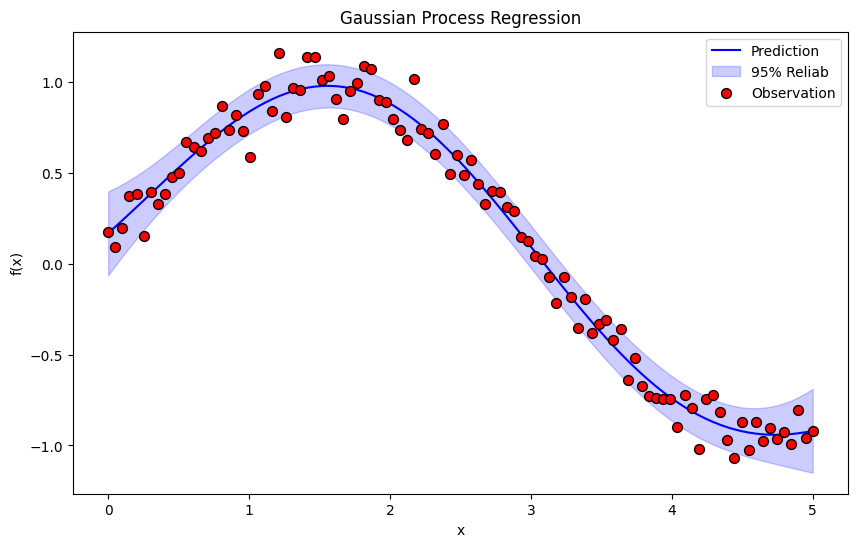

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 샘플 데이터 생성
np.random.seed(0)
X = np.linspace(0, 5, 100).reshape(-1, 1)  # 입력 데이터
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # 노이즈가 있는 사인 함수

# 가우시안 프로세스 설정 및 학습
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))  # 커널 정의: 상수 * RBF
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)  # 가우시안 프로세스 회귀 모델
gp.fit(X, y)  # 모델 학습

# 예측 및 표준편차 계산
X_pred = np.linspace(0, 5, 100).reshape(-1, 1)  # 예측할 지점
y_pred, sigma = gp.predict(X_pred, return_std=True)  # 예측 및 표준편차 계산

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(X_pred, y_pred, 'b-', label='Prediction')  # 예측 곡선
plt.fill_between(X_pred.ravel(), 
                 y_pred - 1.96 * sigma,  # 95% 신뢰구간 하한
                 y_pred + 1.96 * sigma,  # 95% 신뢰구간 상한
                 alpha=0.2, color='blue', label='95% Reliab')
plt.scatter(X, y, c='r', s=50, zorder=10, edgecolors='k', label='Observation')  # 실제 데이터 포인트
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()